<a href="https://colab.research.google.com/github/esaucedo19/Multicollinearity-Undergrad-Project/blob/main/Multicollinearity_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.)

#Loading Packages

In [1]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [2]:
install.packages("qpcR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlwidgets’, ‘DEoptimR’, ‘minpack.lm’, ‘rgl’, ‘robustbase’




In [3]:
install.packages("ISLR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(ggplot2)
library(MASS)

In [6]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [7]:
library(qpcR)

Loading required package: minpack.lm

Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”
Loading required package: robustbase

Loading required package: Matrix



In [8]:
library(readxl)

In [9]:
library(ISLR)

In [10]:
library(leaps)

Packages that will allow us to make a better regression model 

#Get Data

In [11]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ psych::%+%()    masks ggplot2::%+%()
✖ psych::alpha()  masks ggplot2::alpha()
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr::select() masks MASS::select()
✖ tidyr::unpack() masks Matrix::unpack()



In [12]:
df = read.table("https://docs.google.com/spreadsheets/d/e/2PACX-1vQet5IXQNIJiogBxKv1MOiPxm5a46ocdMskVwl6nC5AnEUe7Sbuqxmcvu_XtHe4MiLwYgcrSlC5anM5/pub?output=csv", sep = ',', header = TRUE)

In [13]:
colnames(df)[1] <- 'obs_num'

In [14]:
colnames(df)

[1] "obs_num"           "Date"              "Board"            
 [4] "Board_Type"        "Wheel_Diameter"    "Wheel_Durometer"  
 [7] "City_State"        "Distance"          "Calories"         
[10] "Avg_HR"            "Max_HR"            "Avg_Speed"        
[13] "Max_Speed"         "Total_Ascent"      "Total_Descent"    
[16] "Min_Temp"          "Best_Lap_Time"     "Number_of_Laps"   
[19] "Min_Elevation"     "Max_Elevation"     "Temp"             
[22] "Relative_Humidity" "Wind_Speed"

Loading the Data and assigning coloumn names to all values. 

In [15]:
head(df, 15)

,obs_num,Date,Board,Board_Type,Wheel_Diameter,Wheel_Durometer,City_State,Distance,Calories,Avg_HR,⋯,Total_Ascent,Total_Descent,Min_Temp,Best_Lap_Time,Number_of_Laps,Min_Elevation,Max_Elevation,Temp,Relative_Humidity,Wind_Speed
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,⋯,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,0,2021-03-13 14:29:23,Loaded Icarus,Drop Through,80,80,"Ripon, WI",5.17,460,131,⋯,167,184,66.2,01:59.81.9,2,889,974,39.92,46,10.314759
2,1,2021-03-23 8:51:41,Loaded Icarus,Drop Through,80,80,"Ripon, WI",4.26,319,120,⋯,108,138,57.2,42:53.64.6,1,858,932,46.04,86,0.000000
3,3,2021-04-06 15:36:31,Loaded Icarus,Drop Through,80,80,"Ripon, WI",4.95,495,133,⋯,118,151,82.4,52:36.75.6,1,985,1040,69.08,61,11.433226
4,4,2021-04-07 8:45:01,Loaded Icarus,Drop Through,80,80,"Ripon, WI",4.01,305,119,⋯,92,95,69.8,40:33.02.9,1,952,991,55.04,80,5.840887
5,5,2021-04-10 13:08:11,Gbomb X24,Platform,80,80,"Ripon, WI",4.57,268,121,⋯,115,128,57.2,0:33:09,1,971,1054,51.08,86,8.077823
6,6,2021-04-11 15:16:09,Gbomb X24,Platform,80,80,"Ripon, WI",4.66,260,126,⋯,102,131,64.4,29:27.83.2,1,940,1016,50.00,93,8.077823
7,7,2021-04-11 15:50:28,Gbomb X24,Platform,80,80,"Ripon, WI",4.65,328,136,⋯,105,128,66.2,33:16.35.2,1,953,1026,50.00,93,8.077823
8,8,2021-04-13 15:11:19,Gbomb X24,Platform,80,80,"Ripon, WI",7.16,483,116,⋯,174,184,46.4,19:59.17.6,2,972,1057,42.98,60,11.433226
9,9,2021-04-15 14:15:54,Gbomb X24,Platform,80,80,"Ripon, WI",8.69,627,130,⋯,289,305,50.0,32:11.59.3,2,949,1048,42.98,65,12.738105


In [16]:
vars = c("Avg_Speed", "Distance", "Wind_Speed2",  "Ascent_Ratio", "Wheel_Diameter","Wheel_Durometer", "log_exp","Avg_HR","Intensity", "Total_Ascent")
preprocess <- function(df){
    pro_df <- df
    first_day <- "2021-03-13 00:00:00"
    pro_df$Experience <- as.numeric(difftime(pro_df$Date, first_day, units = "days"))
    pro_df$Ascent_Ratio <- pro_df$Total_Ascent / pro_df$Distance
    pro_df$log_exp <- log(pro_df$Experience)
    pro_df$Wind_Speed2 <- pro_df$Wind_Speed^2
    pro_df$Intensity <- pro_df$Max_HR*pro_df$Calories
    pro_df <- subset(pro_df, select = vars)
    return(pro_df)
    }

These Functions allow us to focus on certain regressors from the data set. First we define the names of the regressors, and the function will get the already given values, we will then need to define the rest on functions in variable selection. Based on leaps regression conducted on the data set, the nine regressors chosen were the best in order to get an R-Squared Value closest to one

In [17]:
# df
pro_df <- preprocess(df)
head(pro_df, 70)

,Avg_Speed,Distance,Wind_Speed2,Ascent_Ratio,Wheel_Diameter,Wheel_Durometer,log_exp,Avg_HR,Intensity,Total_Ascent
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>
1,6.1,5.17,106.39424,32.30174,80,80,-0.5046142,131,69920,167
2,6.0,4.26,0.00000,25.35211,80,80,2.3388422,120,45298,108
3,5.6,4.95,130.71867,23.83838,80,80,3.2047915,133,79200,118
4,5.9,4.01,34.11597,22.94264,80,80,3.2333543,119,43005,92
5,8.3,4.57,65.25122,25.16411,80,80,3.3515641,121,38056,115
6,9.5,4.66,65.25122,21.88841,80,80,3.3889971,126,37440,102
7,8.4,4.65,65.25122,22.58065,80,80,3.3898009,136,54776,105
8,5.6,7.16,130.71867,24.30168,80,80,3.4541964,116,70035,174
9,7.3,8.69,162.25933,33.25662,80,80,3.5143586,130,97185,289


Table of the selected regressors

#Fitting Model

In [ ]:
lin_mod13 = lm(Avg_Speed ~ ., data = pro_df)

In [ ]:
summary(lin_mod13)


Call:
lm(formula = Avg_Speed ~ ., data = pro_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7000 -0.3678  0.0005  0.3698  1.8331 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.198e+01  1.957e+01   2.656 0.009224 ** 
Distance         1.090e+00  1.061e-01  10.273  < 2e-16 ***
Wind_Speed2     -7.581e-04  9.762e-04  -0.777 0.439284    
Ascent_Ratio     6.576e-02  1.741e-02   3.776 0.000272 ***
Wheel_Diameter  -1.466e-01  4.777e-02  -3.068 0.002779 ** 
Wheel_Durometer -6.497e-01  1.933e-01  -3.362 0.001103 ** 
log_exp          1.911e-01  1.115e-01   1.714 0.089641 .  
Avg_HR           1.400e-01  9.443e-03  14.828  < 2e-16 ***
Intensity       -9.833e-05  8.338e-06 -11.793  < 2e-16 ***
Total_Ascent    -7.626e-03  2.347e-03  -3.249 0.001583 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7025 on 99 degrees of freedom
  (169 observations deleted due to missingness)
Multiple R-squared:

Summary of the linear model, from the model we can see that the r-squared value is .85 which is the closets I could get to reach an r squared value close to one. From here we can fit the model and try to create a more linear model using differnet regressions.

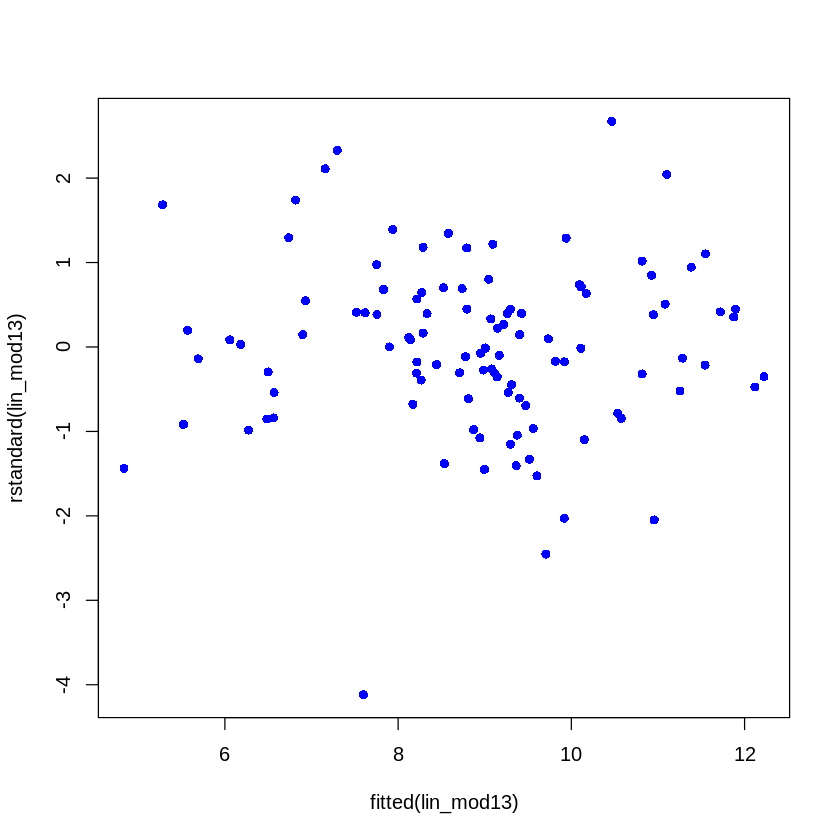

In [ ]:
plot(fitted(lin_mod13), rstandard(lin_mod13), col = "blue", pch = 16)

Based on the graph of the residuals, there are some outlier points, but overall the graph is standard. 

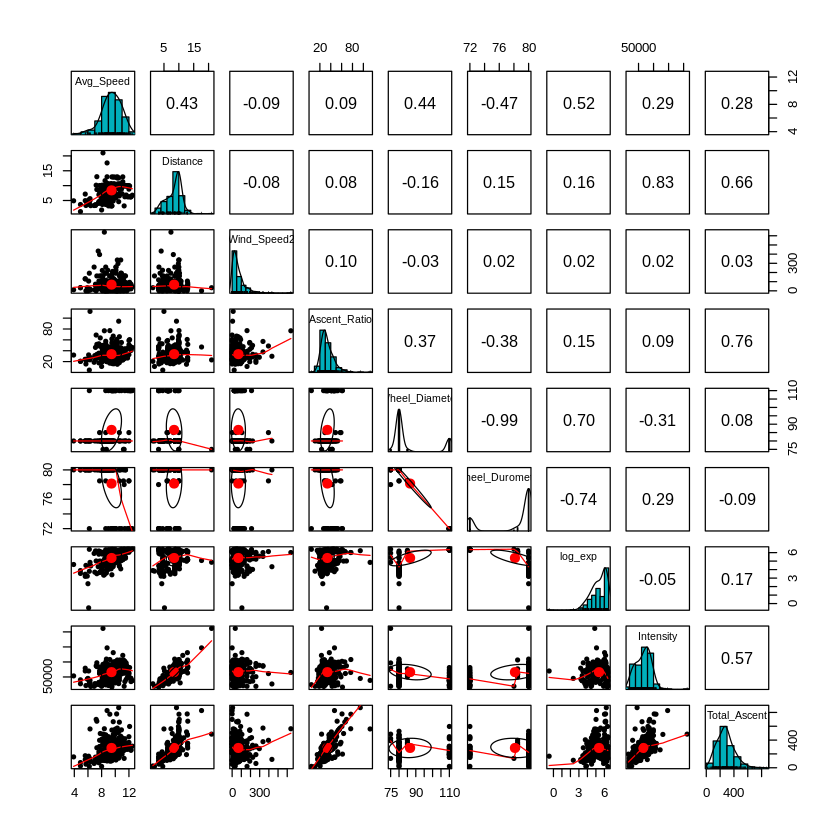

In [ ]:
pairs.panels(pro_df[,-8], 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

This fuctions allows us to compare the importance of each regressor, this was one of the models used to select regressors like the leaps regression. Based on the graph, we can see that each regressor has some relationship to the other regressors

Below, I will use the box-cox method to create a more linear model to the data. 

[1] 1.151515

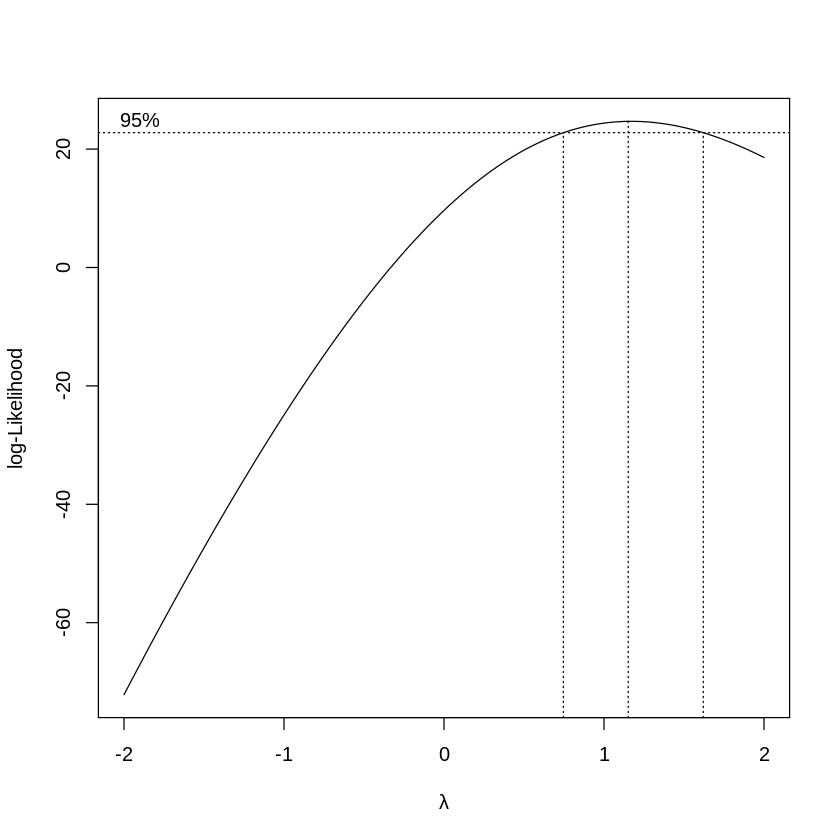

In [ ]:
bc <- boxcox(Avg_Speed ~ ., data = pro_df)
lambdaH <- bc$x[which.max(bc$y)]
lambdaH

Here is a graph for the box-cox method with lambda value. Ideally, we would want a lambda value of 2, which indicated the maximum correlation of the regressors. Here we are at 1.5 which suggests a higher correlation within the values.

In [ ]:
#fit new linear regression model using the Box-Cox transformation
new_model <- lm(((df$Avg_Speed^lambdaH-1)/lambdaH) ~., data = pro_df)

In the new Model, we will implement the lambda function and see how the correlation factor will compare to the orignal model without the correlation factor. 

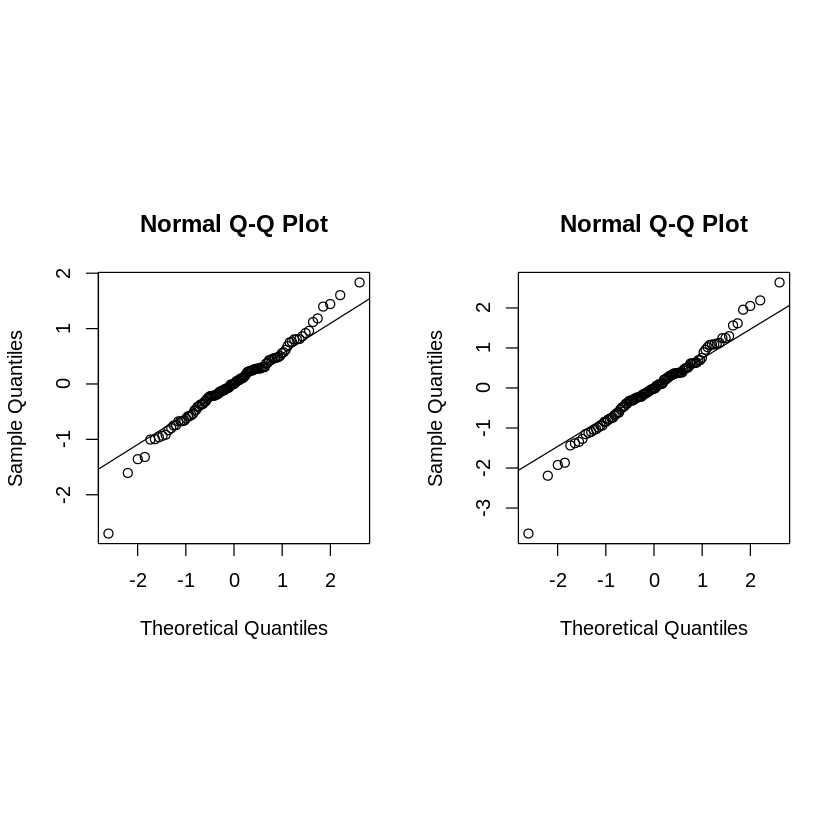

In [ ]:
#define plotting area
op <- par(pty = "s", mfrow = c(1, 2))

#Q-Q plot for original model
qqnorm(lin_mod13$residuals)
qqline(lin_mod13$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(new_model$residuals)
qqline(new_model$residuals)

#display both Q-Q plots
par(op)

On the left is the orginal model and on the right there is the correlation factor model. It is clear while not 100% linear, the orignal model is better in terms of linear regression. The correlation model is less linear, which indicates that there is a factor of autocorrelation present casuing the offest in the new model. 

Bellow we use residuals to calculate the press statistic 

In [ ]:
r <- resid(lin_mod13)

In [ ]:
press_value <- resid(lin_mod13)/(1 - lm.influence(lin_mod13)$hat)

In [ ]:
sum(r^2)

[1] 48.85632

In [ ]:
sum(press_value^2)

[1] 60.37323

While not the best value, the lower press statistic would indicate that the model is close to the estimiated values of the model. 

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRsrPQmR9IOqB9CWH2TjLbZL6upksnYcGYpoL1BcrEHlmDCo7zIOq_Rma_oSugZLWzh643csD2uke14/pub?output=csv"
test = read.table(path, sep = ",", header = TRUE)
pro_test <- preprocess(test)
test_pred <- predict(lin_mod13, pro_test)
test_e <- test_pred - pro_test$Avg_Speed
SSRes <- sum((test_e)^2)
SSRes

[1] 148.6023

#2.)

#Linear Relationship of Board Equipment

In [ ]:
pro_dfNoNA <- na.exclude(pro_df)
summary(pro_dfNoNA)

   Avg_Speed         Distance       Wind_Speed2      Ascent_Ratio   
 Min.   : 3.900   Min.   : 1.270   Min.   :  0.00   Min.   : 4.357  
 1st Qu.: 8.100   1st Qu.: 4.660   1st Qu.: 22.30   1st Qu.:25.352  
 Median : 8.900   Median : 7.070   Median : 51.06   Median :31.135  
 Mean   : 8.928   Mean   : 7.225   Mean   : 70.82   Mean   :33.373  
 3rd Qu.: 9.700   3rd Qu.: 9.850   3rd Qu.: 96.39   3rd Qu.:41.440  
 Max.   :12.500   Max.   :21.020   Max.   :433.30   Max.   :61.562  
 Wheel_Diameter   Wheel_Durometer    log_exp            Avg_HR     
 Min.   : 75.00   Min.   :72.00   Min.   :-0.5046   Min.   : 94.0  
 1st Qu.: 80.00   1st Qu.:78.50   1st Qu.: 4.1018   1st Qu.:116.0  
 Median : 80.00   Median :80.00   Median : 4.5982   Median :122.0  
 Mean   : 86.61   Mean   :78.14   Mean   : 4.8281   Mean   :122.5  
 3rd Qu.: 85.00   3rd Qu.:80.00   3rd Qu.: 6.1302   3rd Qu.:130.0  
 Max.   :110.00   Max.   :80.00   Max.   : 6.4076   Max.   :149.0  
   Intensity       Total_Ascent  
 Min.  

This function removes all the null values from regressors that we will be using for the model we create for equitment. 

In this model we will have to use wheel diameter and while durometer, which have missing values, this function gets rid of the columns that do not have values in them, so that they will not have any bearing on the outcome. 

In [ ]:
modBIC1 <- MASS::stepAIC(lm(Avg_Speed ~ ., data = pro_dfNoNA),
                         k = log(nrow(pro_dfNoNA)), trace = 0)

This function replaces all the null values in the row with value K, which disregards the empty values

In [ ]:
lin_mod14 = lm(df$Avg_Speed ~  pro_df$Wind_Speed + pro_df$Wheel_Diameter + pro_df$Wheel_Durometer + df$Board_Type + df$Temp + df$Relative_Humidity, data = pro_dfNoNA)

Here is the new linear model that will compare the board equitment to natural regressors, namely wind speed, temperature, and relative humidity. 

In [ ]:
summary(lin_mod14)


Call:
lm(formula = df$Avg_Speed ~ pro_df$Wind_Speed + pro_df$Wheel_Diameter + 
    pro_df$Wheel_Durometer + df$Board_Type + df$Temp + df$Relative_Humidity, 
    data = pro_dfNoNA)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6078 -0.5891  0.0219  0.7112  3.2443 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)               153.952077  47.098376   3.269  0.00148 **
pro_df$Wind_Speed          -0.000879   0.002095  -0.420  0.67569   
pro_df$Wheel_Diameter      -0.334950   0.124098  -2.699  0.00816 **
pro_df$Wheel_Durometer     -1.493399   0.467523  -3.194  0.00188 **
df$Board_TypeDrop Through  -2.382388   0.818868  -2.909  0.00446 **
df$Board_TypePlatform       0.196891   0.438483   0.449  0.65438   
df$Board_TypeTop Mount     -0.457893   0.986691  -0.464  0.64361   
df$Temp                     0.009671   0.012067   0.801  0.42474   
df$Relative_Humidity        0.002196   0.008521   0.258  0.79719   
---
Signif. codes:  0 ‘***’ 0.

Here is the summary for the linear model of equitment, it was a low R-Squared indicating that the regressors have a high variablity, and that the model does not follow the security of the data set. 

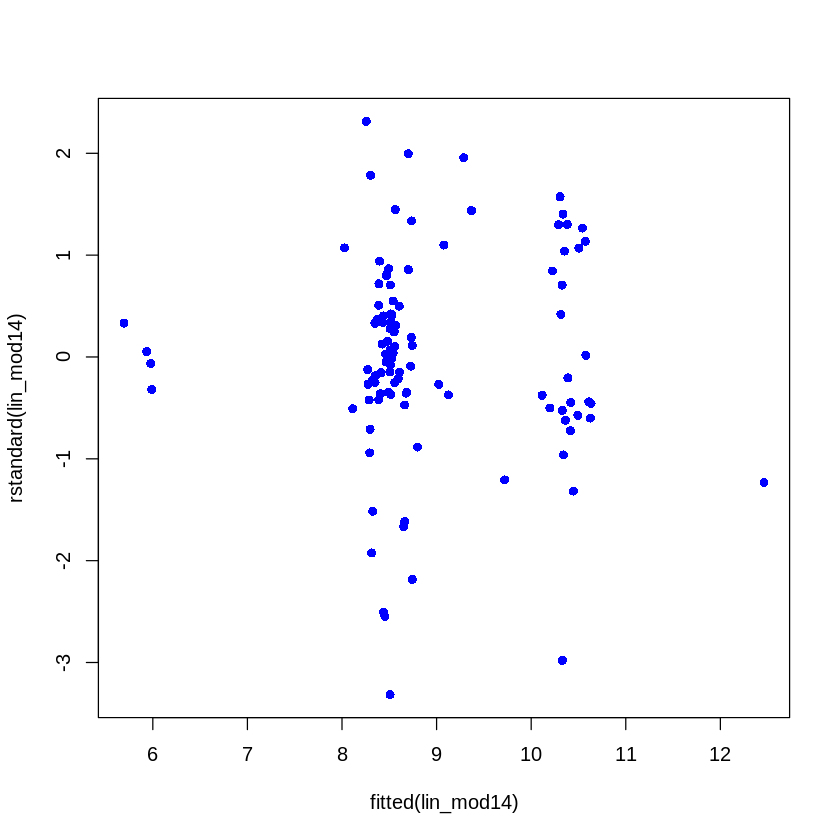

In [ ]:
plot(fitted(lin_mod14), rstandard(lin_mod14), col = "blue", pch = 16)

Here is the a graph of the residuals indicating that the residuals have the correlation towards the center. 

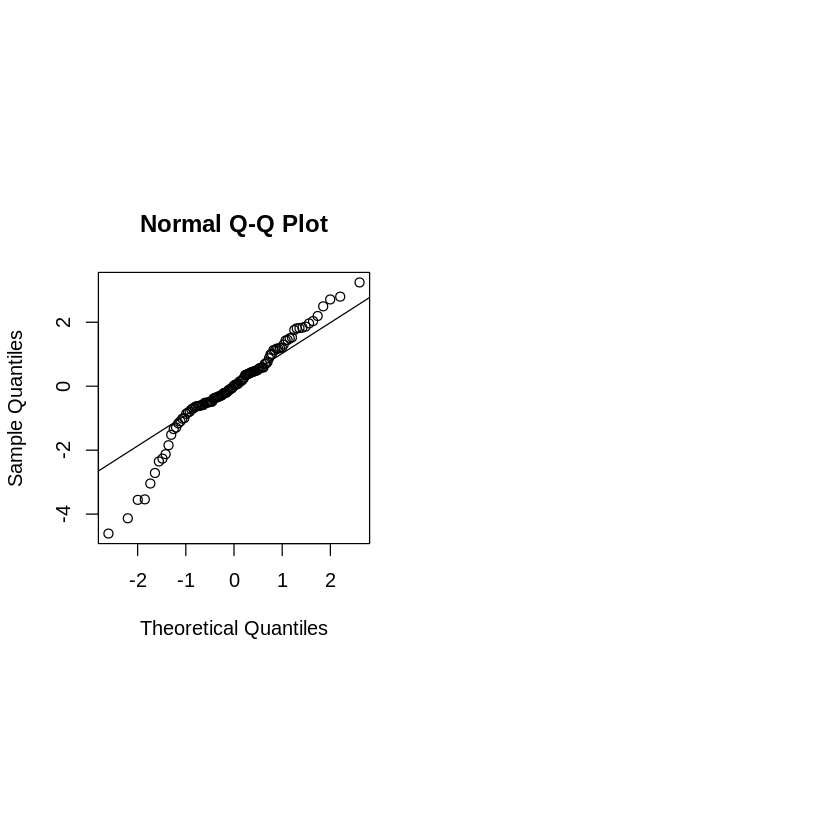

In [ ]:
#define plotting area
op <- par(pty = "s", mfrow = c(1, 2))

#Q-Q plot for original model
qqnorm(lin_mod14$residuals)
qqline(lin_mod14$residuals)

Using Box Cox Method we can see that the new linear model shows that the linear regression has worse relationship with the equitment data and the natural data

In [ ]:
confint(lin_mod14,level = 0.95)

,2.5 %,97.5 %
(Intercept),60.510240165,247.39391463
pro_df$Wind_Speed,-0.005035213,0.00327725
pro_df$Wheel_Diameter,-0.581156639,-0.08874272
pro_df$Wheel_Durometer,-2.420951883,-0.56584600
df$Board_TypeDrop Through,-4.007000058,-0.75777663
df$Board_TypePlatform,-0.673046843,1.06682799
df$Board_TypeTop Mount,-2.415459437,1.49967289
df$Temp,-0.014268675,0.03361172
df$Relative_Humidity,-0.014709831,0.01910114


Based on the condfidence intervals, in the 95% group, the regressors that will effect the data the most are the board type, wind speed and temperature, and relative humidity. Those regressors have value of zero in thier group, so that would indicate that they would have more statistically significance. 

As far as selecting equitment relative to non equitment regressors. It seems that the natural regressors (regressors based on nature) trump the effectiveness of the equitment type. This means that you would need to focus more on the equitment you will need to buy. For Instance, the temeperatue will affect the durometer of the wheel making it harder or softer. Also the humdity will also affect the board as the type of material of the longboard can be weakend. Moreover, the windspeed can be combated by a larger wheel, a larger wheel can make the rider go faster. Overall, natural regressors can be combated by good equitment. 